<div style="background-color:#0a2b45; color:white; padding:25px; border-radius:10px; 
            text-align:center; font-family:'Segoe UI', sans-serif;">

  <h1 style="margin-bottom:8px;">Amazing International Airlines Inc. ✈️</h1>
  <h3 style="margin-top:0; font-style:italic; font-weight:normal; color:#aad8e6;">
    Geo-Spatial Insights
  </h3>

  <hr style="width:60%; border:1px solid #2fa6c9; margin:15px auto;">

  <p style="margin:5px 0; font-size:15px;">
    <b>Group 4</b> - Data Mining Project (2025/2026)
  </p>
  <p style="margin:0; font-size:13px; color:#b5c6d0;">
    Master in Data Science and Advanced Analytics - Nova Information Management School
  </p>
</div>

<br>

<div style="background-color:#132e3e; color:#e2e8f0; padding:15px 20px; border-left:5px solid #2fa6c9; 
            border-radius:6px; font-family:'Segoe UI', sans-serif; font-size:14px;">

  <b>👩‍💻 Project Authors</b><br>
  Pedro Santos - 20250399 - <a href="mailto:20250399@novaims.unl.pt" style="color:#80d0e0;">20250399@novaims.unl.pt</a><br>
  Miguel Correia - 20250381 - <a href="mailto:20250381@novaims.unl.pt" style="color:#80d0e0;">20250381@novaims.unl.pt</a><br>
  Pedro Fernandes - 20250418 - <a href="mailto:20250418@novaims.unl.pt" style="color:#80d0e0;">20250418@novaims.unl.pt</a><br>
  Tiago Duarte - 20250360 - <a href="mailto:20250360@novaims.unl.pt" style="color:#80d0e0;">20250360@novaims.unl.pt</a>
</div>

<br>

<div style="text-align:right; font-size:12px; color:#9ca3af;">
  Last updated: November 2025
</div>


In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina' 
sns.set()

In [2]:
customer = pd.read_csv('../data/DM_AIAI_CustomerDB.csv')
flights = pd.read_csv('../data/DM_AIAI_FlightsDB.csv')
pd.set_option('display.max_columns', None) #To be able too see all columns
customer.head()


,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


## Visualize geographic concentration of loyalty members.

In the main notebook, we had already plotted this graphic, **anticipating that it might be of interest**.  

Here, we can see a **world map focused on Canada**. The **circles** represent **customer coordinate pairs (latitude and longitude)**, while the **location markers** indicate the **cities where our customers live**. The **different colors** correspond to **various provinces or states**, whose **borders are visible on the map**.


In [3]:
# Remove duplicate coordinates
df_unique = customer.drop_duplicates(subset=['Latitude', 'Longitude'])
unique_cities = customer[['City', 'Province or State']].drop_duplicates(subset=['City'])

# Color mapping for provinces
province_colors = {
    'Ontario': '#FF0000',
    'Quebec': '#8B00FF',
    'British Columbia': '#00AA00',
    'Alberta': '#FF8800',
    'Manitoba': '#CC00CC',
    'Saskatchewan': '#8B0000',
    'Nova Scotia': '#5F9EA0',
    'New Brunswick': '#FF69B4',
    'Newfoundland': '#006400',
    'Newfoundland and Labrador': '#006400',
    'Prince Edward Island': '#DC143C',
    'Northwest Territories': '#808080',
    'Yukon': '#00008B',
    'Nunavut': '#F5DEB3'
}

# Create base map centered on Canada
m = folium.Map(
    location=[56.1304, -106.3468],
    zoom_start=4,
    tiles='OpenStreetMap',
    height='600px',   # ou 500px, 650px…
    width='100%'
)

# Create feature group for customer coordinates
customers_fg = folium.FeatureGroup(name="Customers (Coordinates)", show=True).add_to(m)

# Add circle markers for each unique coordinate
for _, row in df_unique.iterrows():
    province = row.get('Province or State', '')
    color = province_colors.get(province, '#808080')
    tooltip_html = (
        f"<b>City:</b> {row.get('City', '(no city)')}<br>"
        f"<b>Province:</b> {province}<br>"
        f"<b>Latitude:</b> {float(row['Latitude']):.4f}<br>"
        f"<b>Longitude:</b> {float(row['Longitude']):.4f}"
    )
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fillColor=color,
        fill_opacity=0.8,
        tooltip=tooltip_html,
        popup=tooltip_html
    ).add_to(customers_fg)

# Create feature group for cities
cities_fg = folium.FeatureGroup(name="Cities (from dataset)", show=True).add_to(m)

# Add markers for each unique city
for _, city_row in unique_cities.iterrows():
    city_name = city_row['City']
    province = city_row['Province or State']
    coords = customer[customer['City'] == city_name][['Latitude', 'Longitude']].iloc[0]
    color = province_colors.get(province, '#808080')
    folium.Marker(
        location=[coords['Latitude'], coords['Longitude']],
        popup=f"<b>{city_name}</b><br>{province}",
        tooltip=city_name,
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(cities_fg)

# Create collapsible legend
legend_html = '''
<div id="legend-container" style="position: fixed; 
            bottom: 50px; right: 50px; width: 220px; 
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; border-radius: 5px; padding: 0;">
    <div onclick="toggleLegend()" style="
        background-color: #f0f0f0; 
        padding: 10px; 
        cursor: pointer; 
        border-radius: 3px 3px 0 0;
        font-weight: bold;
        display: flex;
        justify-content: space-between;
        align-items: center;">
        <span>Legend</span>
        <span id="legend-toggle" style="font-size: 18px;">−</span>
    </div>
    <div id="legend-content" style="padding: 10px; max-height: 400px; overflow-y: auto;">
        <p style="margin:5px 0; font-weight:bold; font-size:12px;">Customers (Provinces):</p>
'''

# Add province colors to legend
used_provinces = sorted(customer['Province or State'].dropna().unique())
for province in used_provinces:
    color = province_colors.get(province, '#808080')
    legend_html += f'''
        <p style="margin:3px 0; font-size:12px;">
            <i style="background:{color}; width:15px; height:15px; 
               display:inline-block; border-radius:50%; margin-right:5px; border:1px solid #333;"></i>
            {province}
        </p>
    '''

# Add city markers to legend
legend_html += '''
        <hr style="margin:10px 0;">
        <p style="margin:5px 0; font-weight:bold; font-size:12px;">Other:</p>
        <p style="margin:3px 0; font-size:12px;">
            <i class="fa fa-map-marker" style="color:black; margin-right:5px;"></i>
            City Markers
        </p>
    </div>
</div>
<script>
function toggleLegend() {
    var content = document.getElementById('legend-content');
    var toggle = document.getElementById('legend-toggle');
    if (content.style.display === 'none') {
        content.style.display = 'block';
        toggle.innerHTML = '−';
    } else {
        content.style.display = 'none';
        toggle.innerHTML = '+';
    }
}
</script>
'''

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control
folium.LayerControl(collapsed=True).add_to(m)

# Save map to HTML file
#m.save('customer_map.html')

# Display map
m

The regional distribution is concentrated toward the **south, near the US border**, which is expected given the **polar conditions in the north**.  

Along the **longitude axis**, the distribution is **skewed toward both coasts**, with **fewer cities located in the country’s interior**.  

We can also observe major cities such as **Toronto, Vancouver, Montréal, and Ottawa**, as well as **many smaller cities clustered around these urban centers**.

In major cities, we usually see **more than one coordinate point**, since is expected a**higher number of customers living in the same area**.


# Mapping Routes, Hubs and Costumer Origins/Destinations

Here, we are going to add to the previous graphic the **nine main airports in Canada**, which also correspond to the ones with the **highest number of international flights**. They are:

1. **Toronto Pearson International Airport (YYZ)** — Toronto, Ontario  
2. **Vancouver International Airport (YVR)** — Richmond, British Columbia  
3. **Montréal–Pierre Elliott Trudeau International Airport (YUL)** — Montréal, Quebec  
4. **Calgary International Airport (YYC)** — Calgary, Alberta  
5. **Edmonton International Airport (YEG)** — Edmonton, Alberta  
6. **Ottawa Macdonald–Cartier International Airport (YOW)** — Ottawa, Ontario  
7. **Halifax Stanfield International Airport (YHZ)** — Halifax, Nova Scotia  
8. **Winnipeg James Armstrong Richardson International Airport (YWG)** — Winnipeg, Manitoba  
9. **Québec City Jean Lesage International Airport (YQB)** — Québec City, Quebec  

We plotted the **domestic routes** connecting these nine airports, as well as their **international routes**, marking the corresponding **destinations and starting points**.


In [4]:
# Load airports
airports_url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
airports = pd.read_csv(airports_url, header=None, names=[
    'AirportID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 
    'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 
    'Tz_database', 'Type', 'Source'
])

# Load routes
routes_url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
routes = pd.read_csv(routes_url, header=None, names=[
    'Airline', 'AirlineID', 'SourceAirport', 'SourceAirportID',
    'DestinationAirport', 'DestinationAirportID', 'Codeshare',
    'Stops', 'Equipment'
])

# Filter routes that start or end in Canada 
canada_airports_basic = airports[airports['Country'] == 'Canada']
canada_routes = routes[
    routes['SourceAirport'].isin(canada_airports_basic['IATA']) | 
    routes['DestinationAirport'].isin(canada_airports_basic['IATA'])
]

# Calculate number of routes by airport
canada_route_counts = pd.concat([
    canada_routes[canada_routes['SourceAirport'].isin(canada_airports_basic['IATA'])]['SourceAirport'].value_counts(),
    canada_routes[canada_routes['DestinationAirport'].isin(canada_airports_basic['IATA'])]['DestinationAirport'].value_counts()
], axis=1).fillna(0).sum(axis=1).sort_values(ascending=False)

# Pick top 9 (after dropping YZF if it shows up)
top_10_codes = canada_route_counts.head(10).index.tolist()
if 'YZF' in top_10_codes:
    top_10_codes.remove('YZF')
top_9_codes = top_10_codes[:9]

# Keep only those 9 Canadian airports
canada_airports = airports[
    (airports['Country'] == 'Canada') &
    (airports['IATA'].isin(top_9_codes)) &
    (airports['Type'] == 'airport')
].copy()

canada_airports['RouteCount'] = canada_airports['IATA'].map(canada_route_counts)

# Filter all the routes that involve those airports
routes_from_top9 = canada_routes[
    canada_routes['SourceAirport'].isin(top_9_codes) | 
    canada_routes['DestinationAirport'].isin(top_9_codes)
]

# Split into domestic (within those top 9) and international routes
domestic_routes = routes_from_top9[
    routes_from_top9['SourceAirport'].isin(top_9_codes) & 
    routes_from_top9['DestinationAirport'].isin(top_9_codes)
]

international_routes = routes_from_top9[
    ~(routes_from_top9['SourceAirport'].isin(top_9_codes) & 
      routes_from_top9['DestinationAirport'].isin(top_9_codes))
]

# Get international airports that have connections to the Canadian airports
international_airport_codes = set()
for _, route in international_routes.iterrows():
    if route['SourceAirport'] in top_9_codes:
        international_airport_codes.add(route['DestinationAirport'])
    else:
        international_airport_codes.add(route['SourceAirport'])

international_airports = airports[
    (airports['IATA'].isin(international_airport_codes)) &
    (airports['Country'] != 'Canada') &
    (airports['Type'] == 'airport') &
    (airports['IATA'].notna()) &
    (airports['IATA'] != '\\N')
].copy()

# Calculate route counts for international airports
intl_route_counts = pd.concat([
    international_routes[international_routes['SourceAirport'].isin(international_airport_codes)]['SourceAirport'].value_counts(),
    international_routes[international_routes['DestinationAirport'].isin(international_airport_codes)]['DestinationAirport'].value_counts()
], axis=1).fillna(0).sum(axis=1)

international_airports['RouteCount'] = international_airports['IATA'].map(intl_route_counts).fillna(0)

# Filter international routes to keep only those that go to the international airports we identified
international_routes_filtered = international_routes[
    international_routes['SourceAirport'].isin(international_airports['IATA']) |
    international_routes['DestinationAirport'].isin(international_airports['IATA'])
]

# Remove duplicate coordinates from customer data
df_unique = customer.drop_duplicates(subset=['Latitude', 'Longitude'])
unique_cities = customer[['City', 'Province or State']].drop_duplicates(subset=['City'])

# Color mapping for provinces
province_colors = {
    'Ontario': '#FF0000',
    'Quebec': '#8B00FF',
    'British Columbia': '#00AA00',
    'Alberta': '#FF8800',
    'Manitoba': '#CC00CC',
    'Saskatchewan': '#8B0000',
    'Nova Scotia': '#5F9EA0',
    'New Brunswick': '#FF69B4',
    'Newfoundland': '#006400',
    'Newfoundland and Labrador': '#006400',
    'Prince Edward Island': '#DC143C',
    'Northwest Territories': '#808080',
    'Yukon': '#00008B',
    'Nunavut': '#F5DEB3'
}

# Create base map centered on Canada
m = folium.Map(location=[56.1304, -106.3468], zoom_start=4, tiles='OpenStreetMap')

# ===== CANADIAN AIRPORTS (ALWAYS VISIBLE) =====
canadian_airports_group = folium.FeatureGroup(name="🇨🇦 Canadian Airports", show=True).add_to(m)

# The 9 Canadian airports - BLUE
for _, airport in canada_airports.iterrows():
    if pd.notna(airport['Latitude']) and pd.notna(airport['Longitude']):
        popup_html = f"""
        <b>{airport['IATA']}</b><br>
        {airport['Name']}<br>
        {airport['City']}, {airport['Country']}<br>
        <i>Total Routes: {int(airport['RouteCount'])}</i>
        """
        
        folium.Marker(
            location=[airport['Latitude'], airport['Longitude']],
            popup=popup_html,
            tooltip=f"{airport['IATA']} - {airport['Name']}",
            icon=folium.Icon(color='blue', icon='plane', prefix='fa')
        ).add_to(canadian_airports_group)

# ===== DOMESTIC ROUTES (CAN BE TOGGLED SEPARATELY) =====
domestic_routes_group = folium.FeatureGroup(name="✈️ Domestic Routes", show=True).add_to(m)

for _, route in domestic_routes.iterrows():
    origin = canada_airports[canada_airports['IATA'] == route['SourceAirport']]
    dest = canada_airports[canada_airports['IATA'] == route['DestinationAirport']]
    
    if not origin.empty and not dest.empty:
        origin_coords = [origin.iloc[0]['Latitude'], origin.iloc[0]['Longitude']]
        dest_coords = [dest.iloc[0]['Latitude'], dest.iloc[0]['Longitude']]
        
        folium.PolyLine(
            locations=[origin_coords, dest_coords],
            color='#0066CC',
            weight=2,
            opacity=0.6,
            tooltip=f"Domestic: {route['SourceAirport']} → {route['DestinationAirport']}"
        ).add_to(domestic_routes_group)

# ===== INTERNATIONAL NETWORK (AIRPORTS + ROUTES + CITIES) =====
international_group = folium.FeatureGroup(name="🌍 International Network", show=False).add_to(m)

# International routes
for _, route in international_routes_filtered.iterrows():
    if route['SourceAirport'] in top_9_codes:
        origin = canada_airports[canada_airports['IATA'] == route['SourceAirport']]
        dest = international_airports[international_airports['IATA'] == route['DestinationAirport']]
    else:
        origin = international_airports[international_airports['IATA'] == route['SourceAirport']]
        dest = canada_airports[canada_airports['IATA'] == route['DestinationAirport']]
    
    if not origin.empty and not dest.empty:
        origin_coords = [origin.iloc[0]['Latitude'], origin.iloc[0]['Longitude']]
        dest_coords = [dest.iloc[0]['Latitude'], dest.iloc[0]['Longitude']]
        
        folium.PolyLine(
            locations=[origin_coords, dest_coords],
            color='#FF6600',
            weight=1.5,
            opacity=0.4,
            tooltip=f"International: {route['SourceAirport']} → {route['DestinationAirport']}"
        ).add_to(international_group)

# International airports - RED
for _, airport in international_airports.iterrows():
    if pd.notna(airport['Latitude']) and pd.notna(airport['Longitude']):
        popup_html = f"""
        <b>{airport['IATA']}</b><br>
        {airport['Name']}<br>
        {airport['City']}, {airport['Country']}<br>
        <i>Routes to Canada: {int(airport['RouteCount'])}</i>
        """
        
        folium.Marker(
            location=[airport['Latitude'], airport['Longitude']],
            popup=popup_html,
            tooltip=f"{airport['IATA']} - {airport['City']}, {airport['Country']}",
            icon=folium.Icon(color='red', icon='plane', prefix='fa')
        ).add_to(international_group)

# International destination cities (circles)
cities_added = set()
for _, airport in international_airports.iterrows():
    city = airport['City']
    country = airport['Country']
    lat = airport['Latitude']
    lon = airport['Longitude']
    
    city_key = f"{city}_{country}"
    if pd.notna(lat) and pd.notna(lon) and city_key not in cities_added:
        cities_added.add(city_key)
        folium.CircleMarker(
            location=[lat, lon],
            radius=8,
            color='#FF6600',
            fill=True,
            fillColor='#FF6600',
            fillOpacity=0.7,
            popup=f"<b>{city}</b><br>{country}<br>International Connection",
            tooltip=f"{city}, {country}"
        ).add_to(international_group)

# ===== CUSTOMERS =====
customers_fg = folium.FeatureGroup(name="Customers (Coordinates)", show=True).add_to(m)

for _, row in df_unique.iterrows():
    province = row.get('Province or State', '')
    color = province_colors.get(province, '#808080')
    tooltip_html = (
        f"<b>City:</b> {row.get('City', '(no city)')}<br>"
        f"<b>Province:</b> {province}<br>"
        f"<b>Latitude:</b> {float(row['Latitude']):.4f}<br>"
        f"<b>Longitude:</b> {float(row['Longitude']):.4f}"
    )
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fillColor=color,
        fill_opacity=0.8,
        tooltip=tooltip_html,
        popup=tooltip_html
    ).add_to(customers_fg)

# ===== CITIES =====
cities_fg = folium.FeatureGroup(name="Cities (from dataset)", show=True).add_to(m)

for _, city_row in unique_cities.iterrows():
    city_name = city_row['City']
    province = city_row['Province or State']
    coords = customer[customer['City'] == city_name][['Latitude', 'Longitude']].iloc[0]
    color = province_colors.get(province, '#808080')
    folium.Marker(
        location=[coords['Latitude'], coords['Longitude']],
        popup=f"<b>{city_name}</b><br>{province}",
        tooltip=city_name,
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(cities_fg)

# ===== LEGEND IN BOTTOM-LEFT CORNER =====
legend_html = '''
<div id="legend-container" style="position: fixed; 
            bottom: 50px; left: 50px; width: 270px; 
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; border-radius: 5px; padding: 0;">
    <div onclick="toggleLegend()" style="
        background-color: #f0f0f0; 
        padding: 10px; 
        cursor: pointer; 
        border-radius: 3px 3px 0 0;
        font-weight: bold;
        display: flex;
        justify-content: space-between;
        align-items: center;">
        <span>Legend</span>
        <span id="legend-toggle" style="font-size: 18px;">−</span>
    </div>
    <div id="legend-content" style="padding: 10px; max-height: 400px; overflow-y: auto;">
        <p style="margin:5px 0; font-weight:bold; font-size:12px;">Customers (Provinces):</p>
'''

# Add province colors to legend
used_provinces = sorted(customer['Province or State'].dropna().unique())
for province in used_provinces:
    color = province_colors.get(province, '#808080')
    legend_html += f'''
        <p style="margin:3px 0; font-size:12px;">
            <i style="background:{color}; width:15px; height:15px; 
               display:inline-block; border-radius:50%; margin-right:5px; border:1px solid #333;"></i>
            {province}
        </p>
    '''

legend_html += '''
        <hr style="margin:10px 0;">
        <p style="margin:5px 0; font-weight:bold; font-size:12px;">Airports & Routes:</p>
        <p style="margin:3px 0; font-size:12px;">
            🇨🇦
            <i class="fa fa-plane" style="color:blue; margin-left:3px; margin-right:5px;"></i>
            Canadian Airports
        </p>
        <p style="margin:3px 0; font-size:12px;">
            <i class="fa fa-plane" style="color:red; margin-right:5px;"></i>
            International Airports
        </p>
        <p style="margin:3px 0; font-size:12px;">
            <span style="display:inline-block; width:20px; height:2px; background:#0066CC; margin-right:5px;"></span>
            Domestic Routes
        </p>
        <p style="margin:3px 0; font-size:12px;">
            <span style="display:inline-block; width:20px; height:2px; background:#FF6600; margin-right:5px;"></span>
            International Routes
        </p>
        <p style="margin:3px 0; font-size:12px;">
            <i style="background:#FF6600; width:15px; height:15px; 
               display:inline-block; border-radius:50%; margin-right:5px; border:1px solid #333;"></i>
            Connection Cities
        </p>
        <hr style="margin:10px 0;">
        <p style="margin:5px 0; font-weight:bold; font-size:12px;">Other:</p>
        <p style="margin:3px 0; font-size:12px;">
            <i class="fa fa-map-marker" style="color:black; margin-right:5px;"></i>
            City Markers
        </p>
    </div>
</div>
<script>
function toggleLegend() {
    var content = document.getElementById('legend-content');
    var toggle = document.getElementById('legend-toggle');
    if (content.style.display === 'none') {
        content.style.display = 'block';
        toggle.innerHTML = '−';
    } else {
        content.style.display = 'none';
        toggle.innerHTML = '+';
    }
}
</script>
'''

m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control
folium.LayerControl(collapsed=False).add_to(m)

# JavaScript to manage dependencies between layers
dependency_js = """
<script>
var map = document.querySelector('.folium-map');
var observer = new MutationObserver(function(mutations) {
    var canadianCheckbox = null;
    var domesticCheckbox = null;
    var internationalCheckbox = null;
    
    // Find checkboxes
    var labels = document.querySelectorAll('.leaflet-control-layers-overlays label');
    labels.forEach(function(label) {
        var span = label.querySelector('span');
        if (span && span.textContent.includes('Canadian Airports')) {
            canadianCheckbox = label.querySelector('input[type="checkbox"]');
        }
        if (span && span.textContent.includes('Domestic Routes')) {
            domesticCheckbox = label.querySelector('input[type="checkbox"]');
        }
        if (span && span.textContent.includes('International Network')) {
            internationalCheckbox = label.querySelector('input[type="checkbox"]');
        }
    });
    
    if (canadianCheckbox && domesticCheckbox && internationalCheckbox) {
        // Add change listener to Canadian Airports
        canadianCheckbox.addEventListener('change', function() {
            if (!this.checked) {
                // If Canadian Airports is unchecked, uncheck and disable others
                if (domesticCheckbox.checked) domesticCheckbox.click();
                if (internationalCheckbox.checked) internationalCheckbox.click();
                domesticCheckbox.disabled = true;
                internationalCheckbox.disabled = true;
                domesticCheckbox.parentElement.style.opacity = '0.5';
                internationalCheckbox.parentElement.style.opacity = '0.5';
            } else {
                // If Canadian Airports is checked, enable others
                domesticCheckbox.disabled = false;
                internationalCheckbox.disabled = false;
                domesticCheckbox.parentElement.style.opacity = '1';
                internationalCheckbox.parentElement.style.opacity = '1';
            }
        });
        
        observer.disconnect();
    }
});

observer.observe(document.body, {
    childList: true,
    subtree: true
});
</script>
"""

m.get_root().html.add_child(folium.Element(dependency_js))

# Save map (optional)
# m.save('customer_map_final.html')
m


We observed that the **main airports are located in the largest cities and in the provincial or state capitals**, following the customers’ distribution. The **majority of the customers are expected to travel through one of these routes.**


## 3. Relate geographic differences to potential segmentation variables

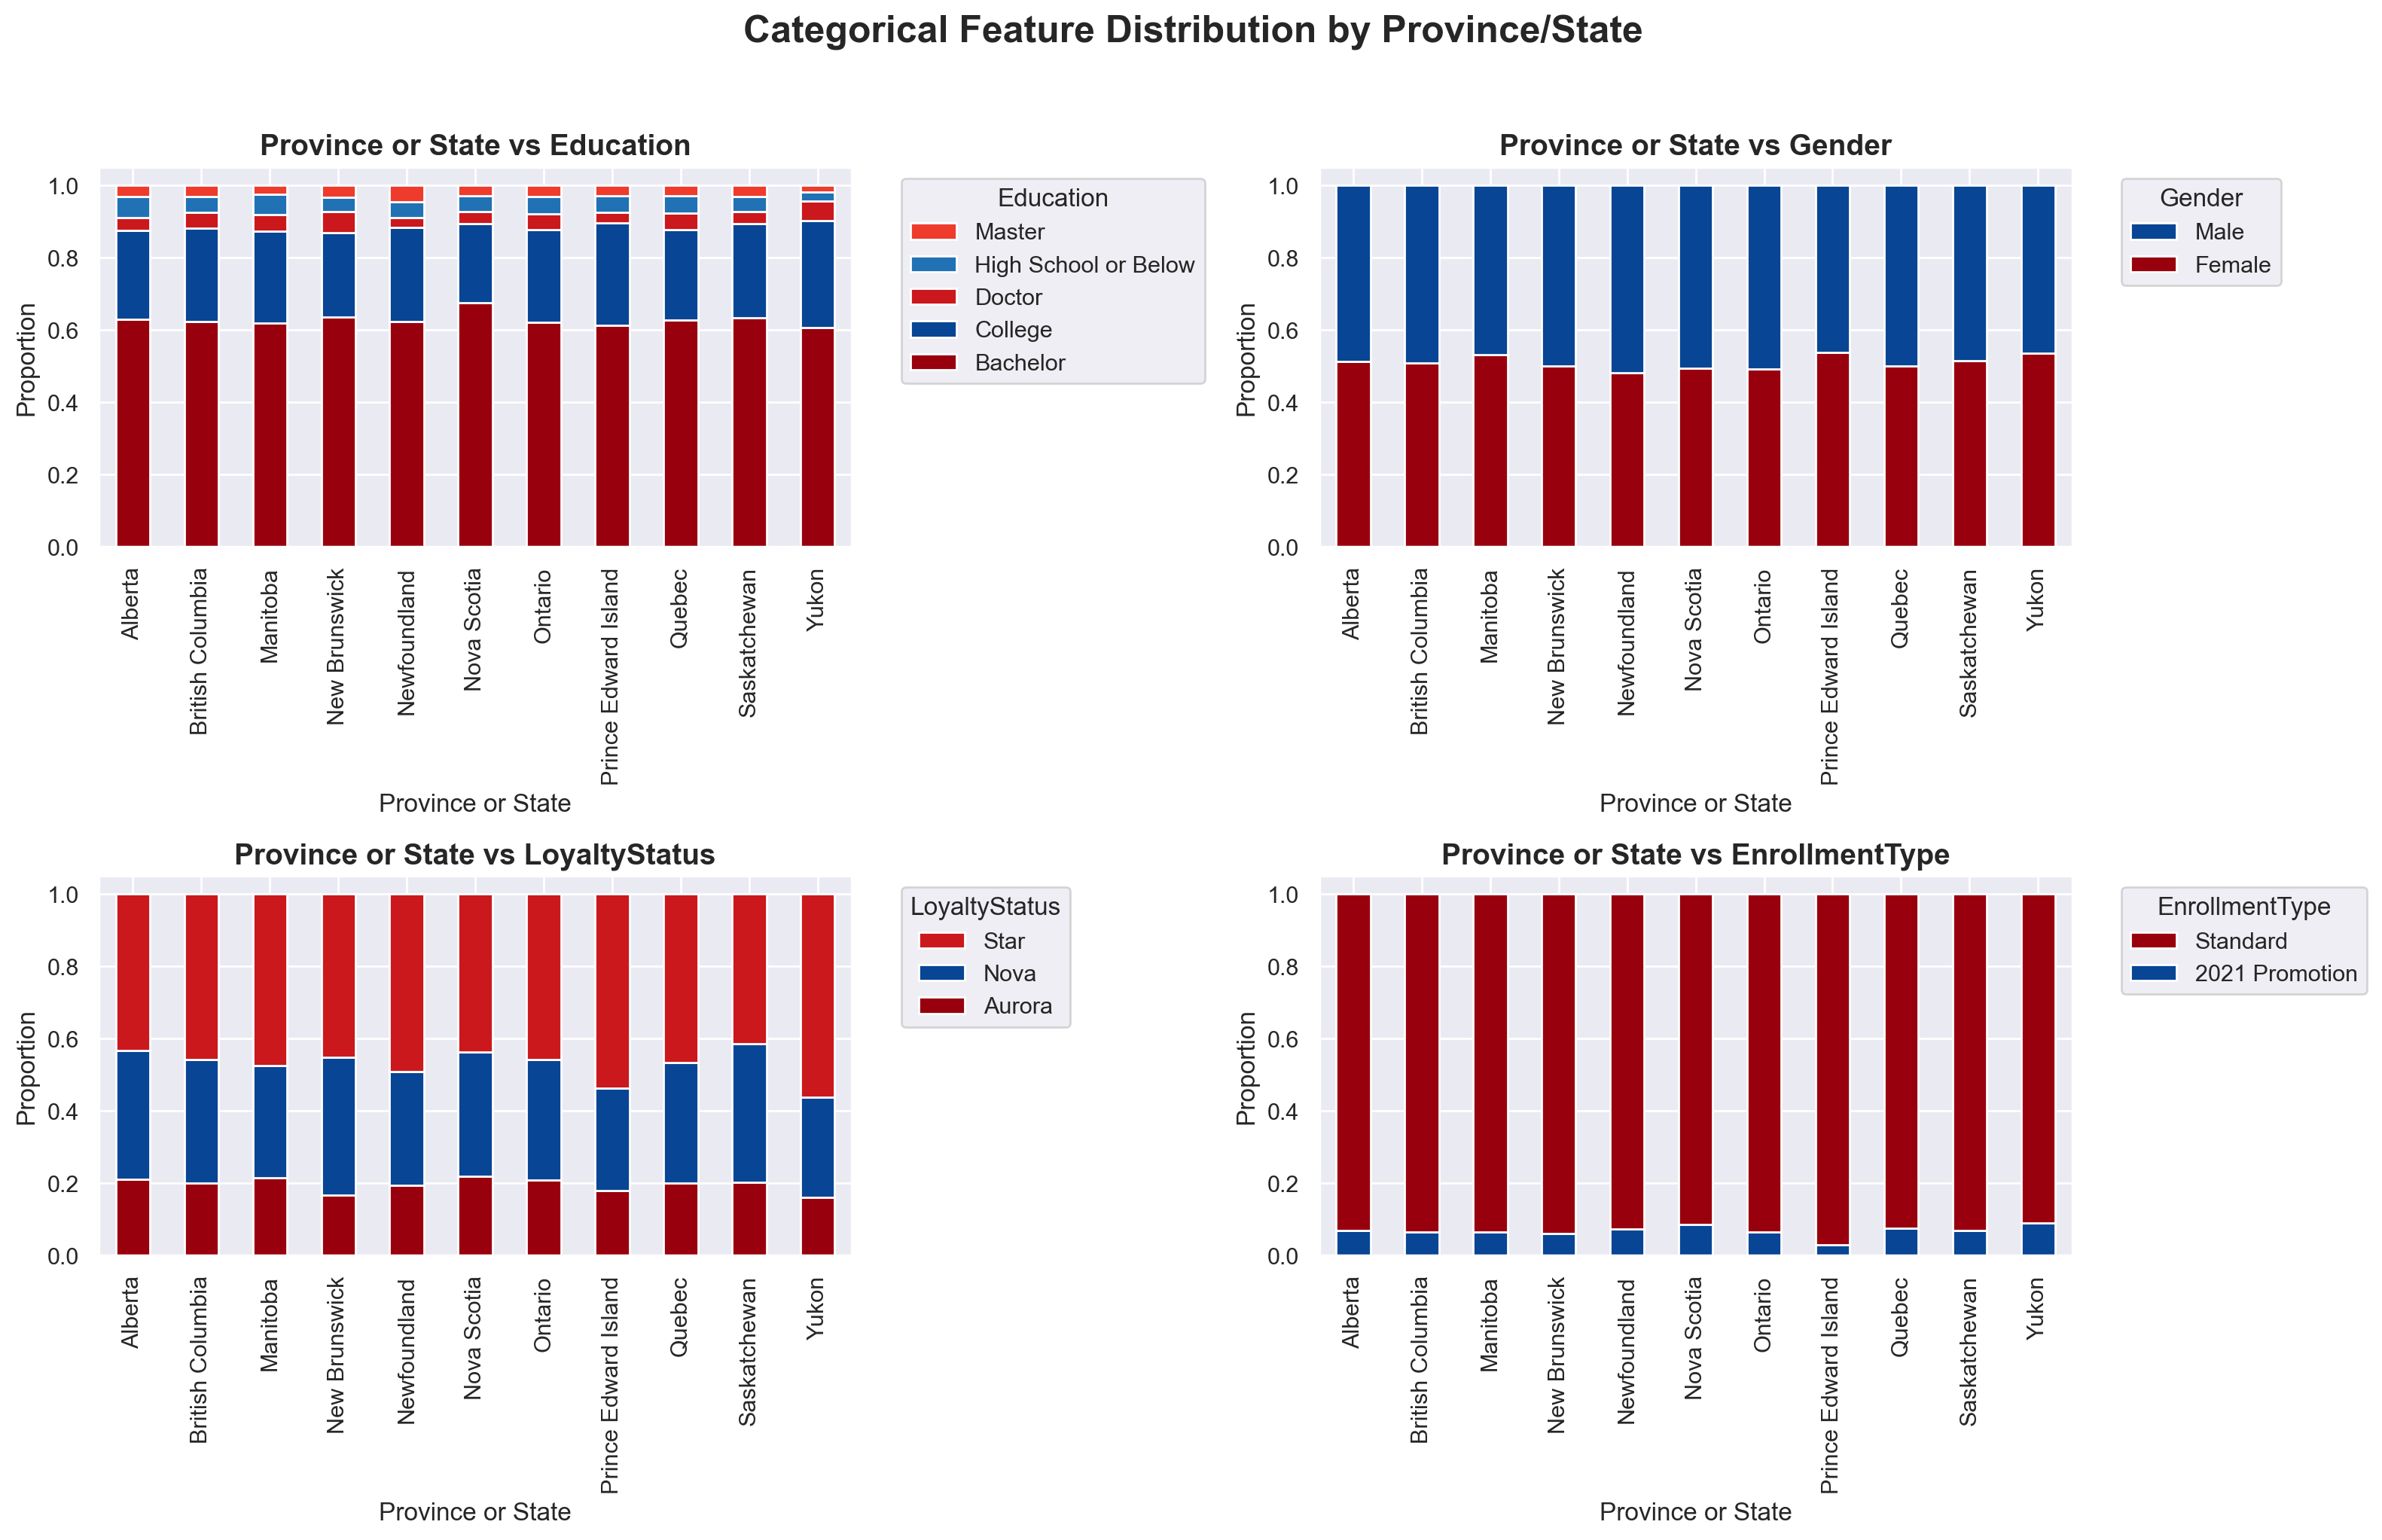

In [5]:
# Define categorical features for analysis
categorical_features = ['Education', 'Gender', 'LoyaltyStatus', 'EnrollmentType']

# Normalize Gender for consistent labeling
customer['Gender'] = (
    customer['Gender']
    .astype(str)
    .str.strip()
    .str.title()  # e.g., "male" → "Male"
)

# Define color palettes for visualization
BLUES = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1']
REDS  = ['#99000d', '#cb181d', '#ef3b2c', '#fb6a4a', '#fcae91']

def get_alternating_colors(n, start_with_blue=True):
    """Generate n colors by alternating between blue and red palettes."""
    colors, blue_idx, red_idx = [], 0, 0
    for i in range(n):
        if (i % 2 == 0) == start_with_blue:
            colors.append(BLUES[min(blue_idx, len(BLUES) - 1)])
            blue_idx += 1
        else:
            colors.append(REDS[min(red_idx, len(REDS) - 1)])
            red_idx += 1
    return colors

# Create color mapping for each category
color_map = {}

for feature in categorical_features:
    categories = sorted(customer[feature].dropna().unique())

    if feature == 'Gender' and len(categories) == 2:
        for cat in categories:
            color_map[cat] = BLUES[0] if cat == 'Male' else REDS[0]
    else:
        start_blue = feature in ['Gender', 'EnrollmentType']
        palette = get_alternating_colors(len(categories), start_with_blue=start_blue)
        for i, cat in enumerate(categories):
            color_map[cat] = palette[i]

# ---- PLOT ----
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols  # ensure enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()  # make indexing easier

for idx, feature in enumerate(categorical_features):
    ax = axes[idx]
    province_crosstab = pd.crosstab(
        customer["Province or State"],
        customer[feature],
        normalize='index'
    )

    province_colors = [color_map[col] for col in province_crosstab.columns]

    province_crosstab.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        color=province_colors,
        legend=True
    )

    ax.set_title(f"Province or State vs {feature}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Province or State")
    ax.set_ylabel("Proportion")

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles[::-1],
        labels[::-1],
        title=feature,
        bbox_to_anchor=(1.05, 1),
        loc="upper left"
    )

# Hide any unused subplots (if features < grid size)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distribution by Province/State", fontsize=18, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()


Here, comparing categorical variables by province or state, we can see that:

- There are **no significant differences** in **Education**, **Loyalty Status**, or **Gender** across provinces.  
- **Enrollment Type** is generally similar across provinces, **except for _Prince Edward Island_**, which shows **almost no participation in the _2021 Promotion_ enrollment**.


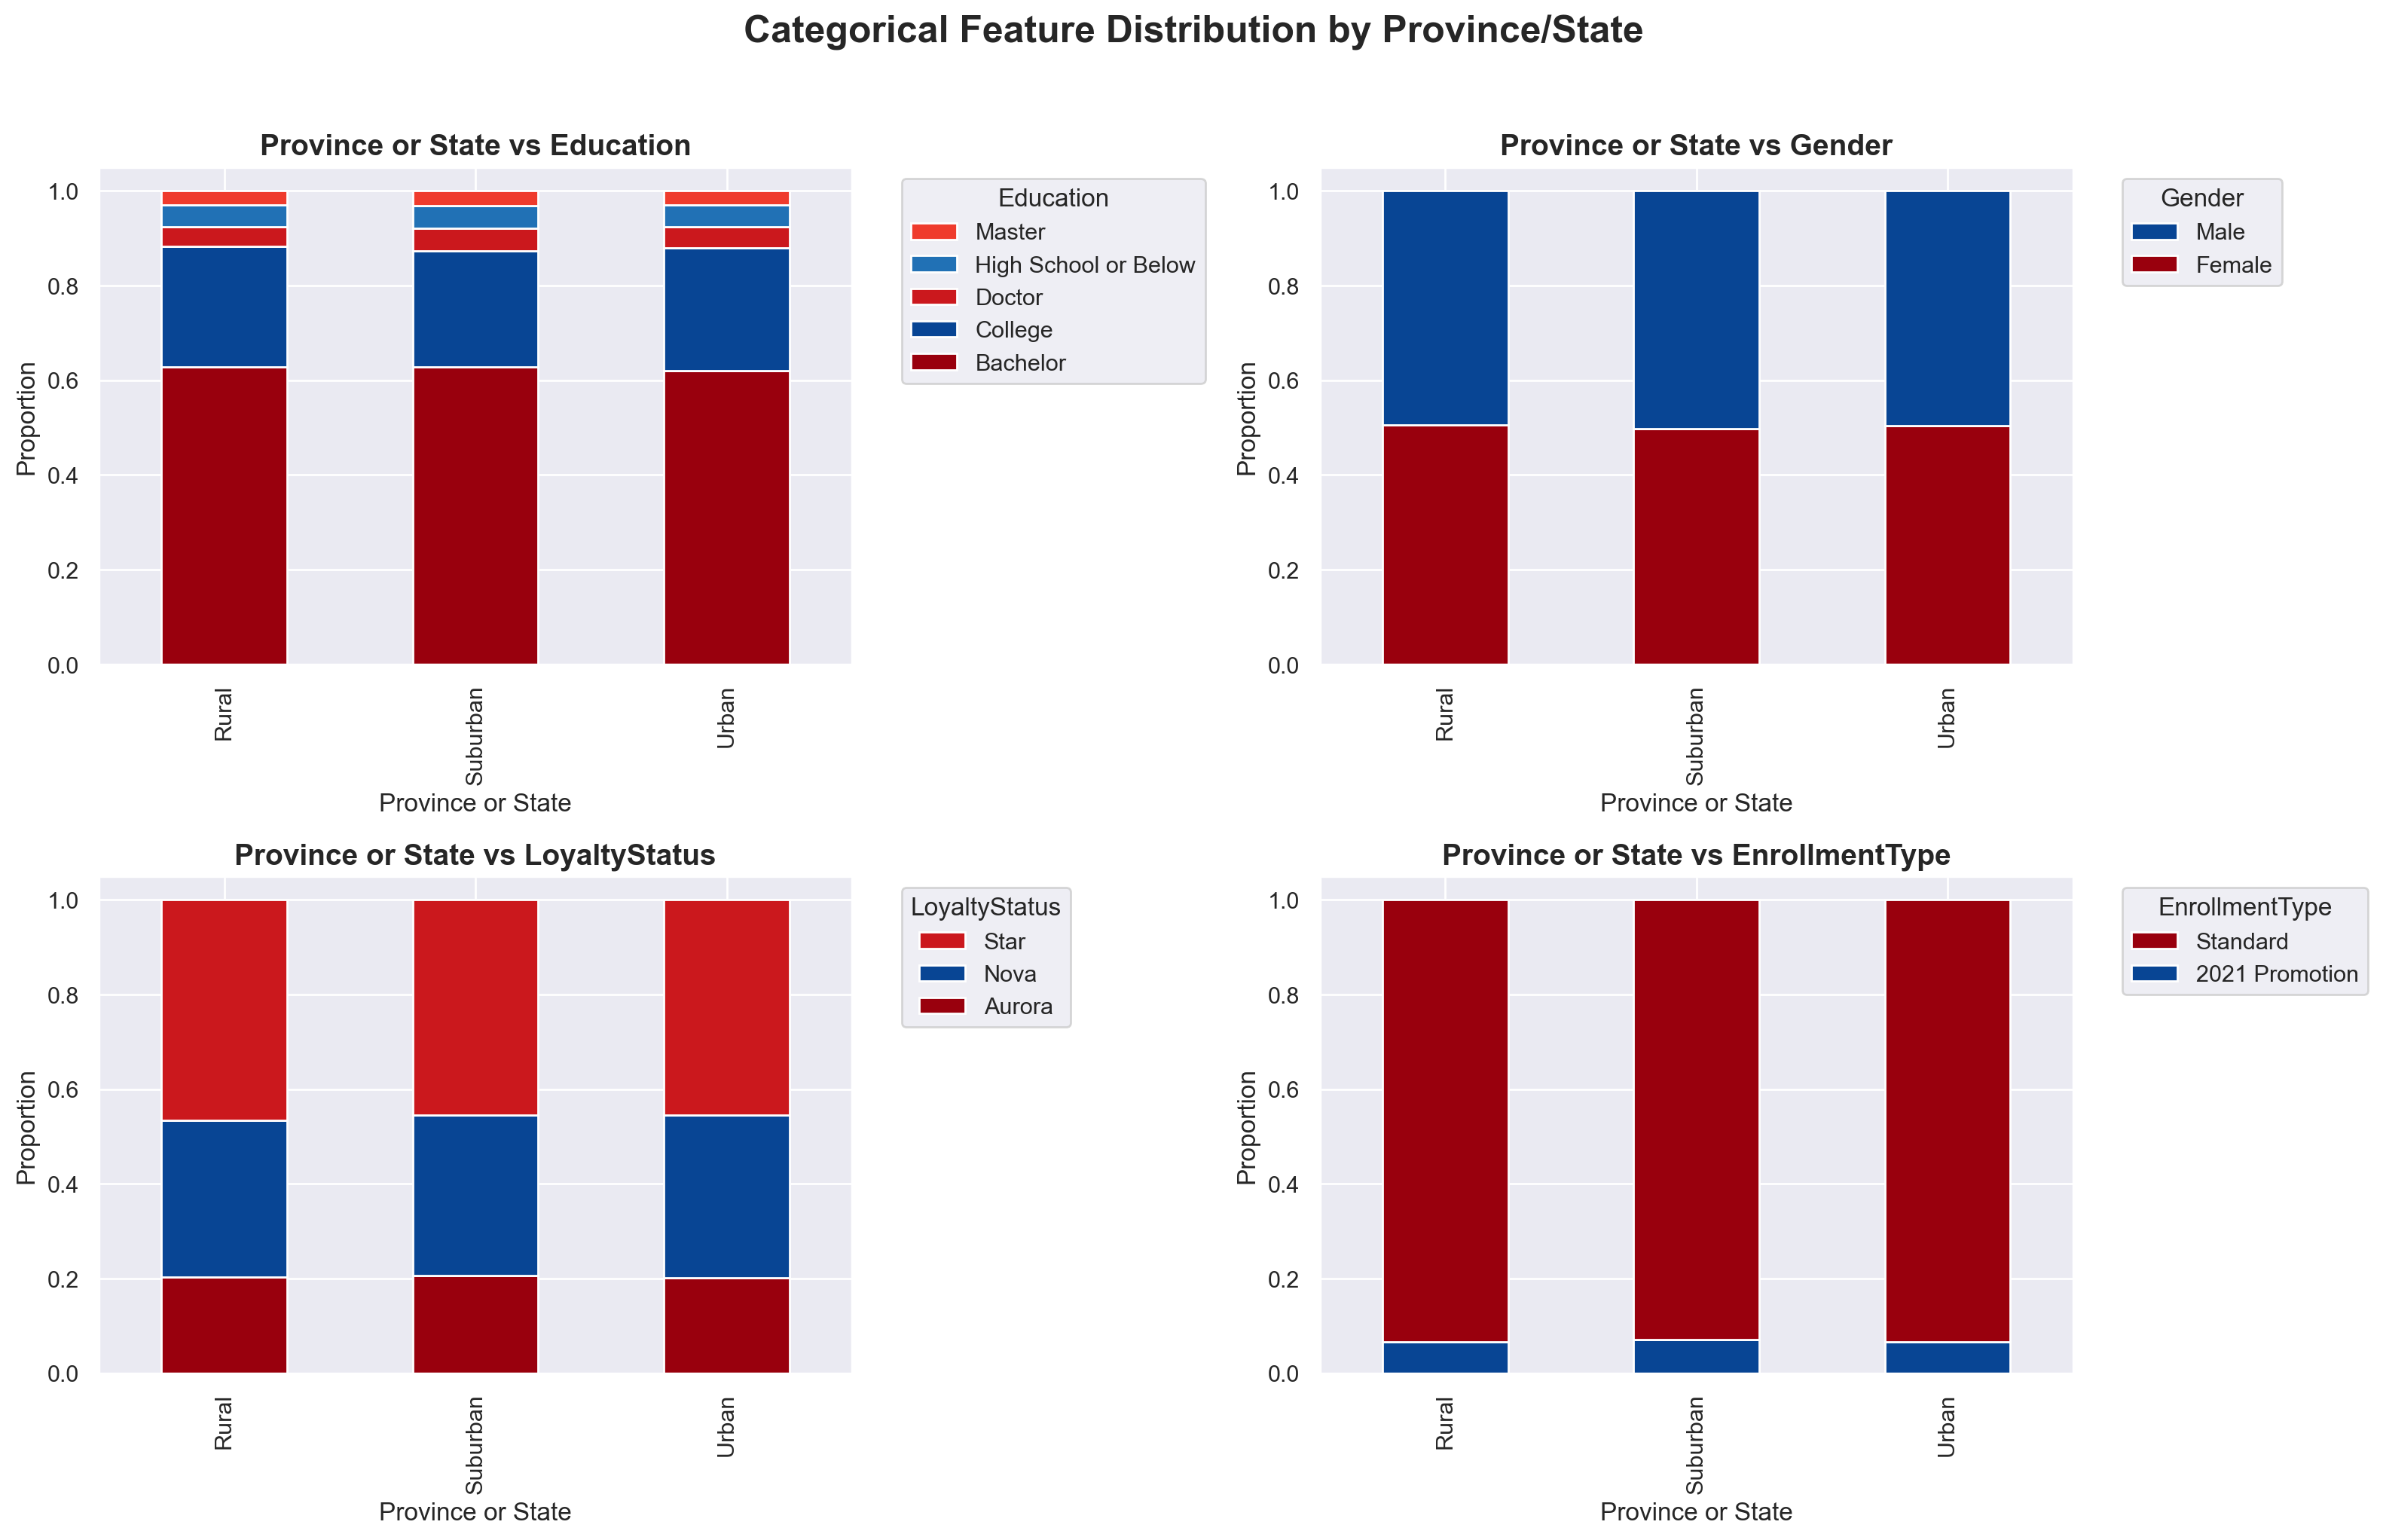

In [6]:
# Define categorical features for analysis
categorical_features = ['Education', 'Gender', 'LoyaltyStatus', 'EnrollmentType']

# Normalize Gender for consistent labeling
customer['Gender'] = (
    customer['Gender']
    .astype(str)
    .str.strip()
    .str.title()  
)

# Define color palettes for visualization
BLUES = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1']
REDS  = ['#99000d', '#cb181d', '#ef3b2c', '#fb6a4a', '#fcae91']

def get_alternating_colors(n, start_with_blue=True):
    """Generate n colors by alternating between blue and red palettes."""
    colors, blue_idx, red_idx = [], 0, 0
    for i in range(n):
        if (i % 2 == 0) == start_with_blue:
            colors.append(BLUES[min(blue_idx, len(BLUES) - 1)])
            blue_idx += 1
        else:
            colors.append(REDS[min(red_idx, len(REDS) - 1)])
            red_idx += 1
    return colors

# Create color mapping for each category
color_map = {}

for feature in categorical_features:
    categories = sorted(customer[feature].dropna().unique())

    if feature == 'Gender' and len(categories) == 2:
        for cat in categories:
            color_map[cat] = BLUES[0] if cat == 'Male' else REDS[0]
    else:
        start_blue = feature in ['Gender', 'EnrollmentType']
        palette = get_alternating_colors(len(categories), start_with_blue=start_blue)
        for i, cat in enumerate(categories):
            color_map[cat] = palette[i]

# ---- PLOT ----
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols  # ensure enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()  # make indexing easier

for idx, feature in enumerate(categorical_features):
    ax = axes[idx]
    province_crosstab = pd.crosstab(
        customer["Location Code"],
        customer[feature],
        normalize='index'
    )

    province_colors = [color_map[col] for col in province_crosstab.columns]

    province_crosstab.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        color=province_colors,
        legend=True
    )

    ax.set_title(f"Province or State vs {feature}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Province or State")
    ax.set_ylabel("Proportion")

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles[::-1],
        labels[::-1],
        title=feature,
        bbox_to_anchor=(1.05, 1),
        loc="upper left"
    )

# Hide any unused subplots (if features < grid size)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distribution by Province/State", fontsize=18, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()


No major differences in categorical variables are observed across provinces.

### 3.2. Geographic Differences with Numerical Features

C:\Users\Calhaugamer555\AppData\Local\Temp\ipykernel_18356\2239980997.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Calhaugamer555\AppData\Local\Temp\ipykernel_18356\2239980997.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


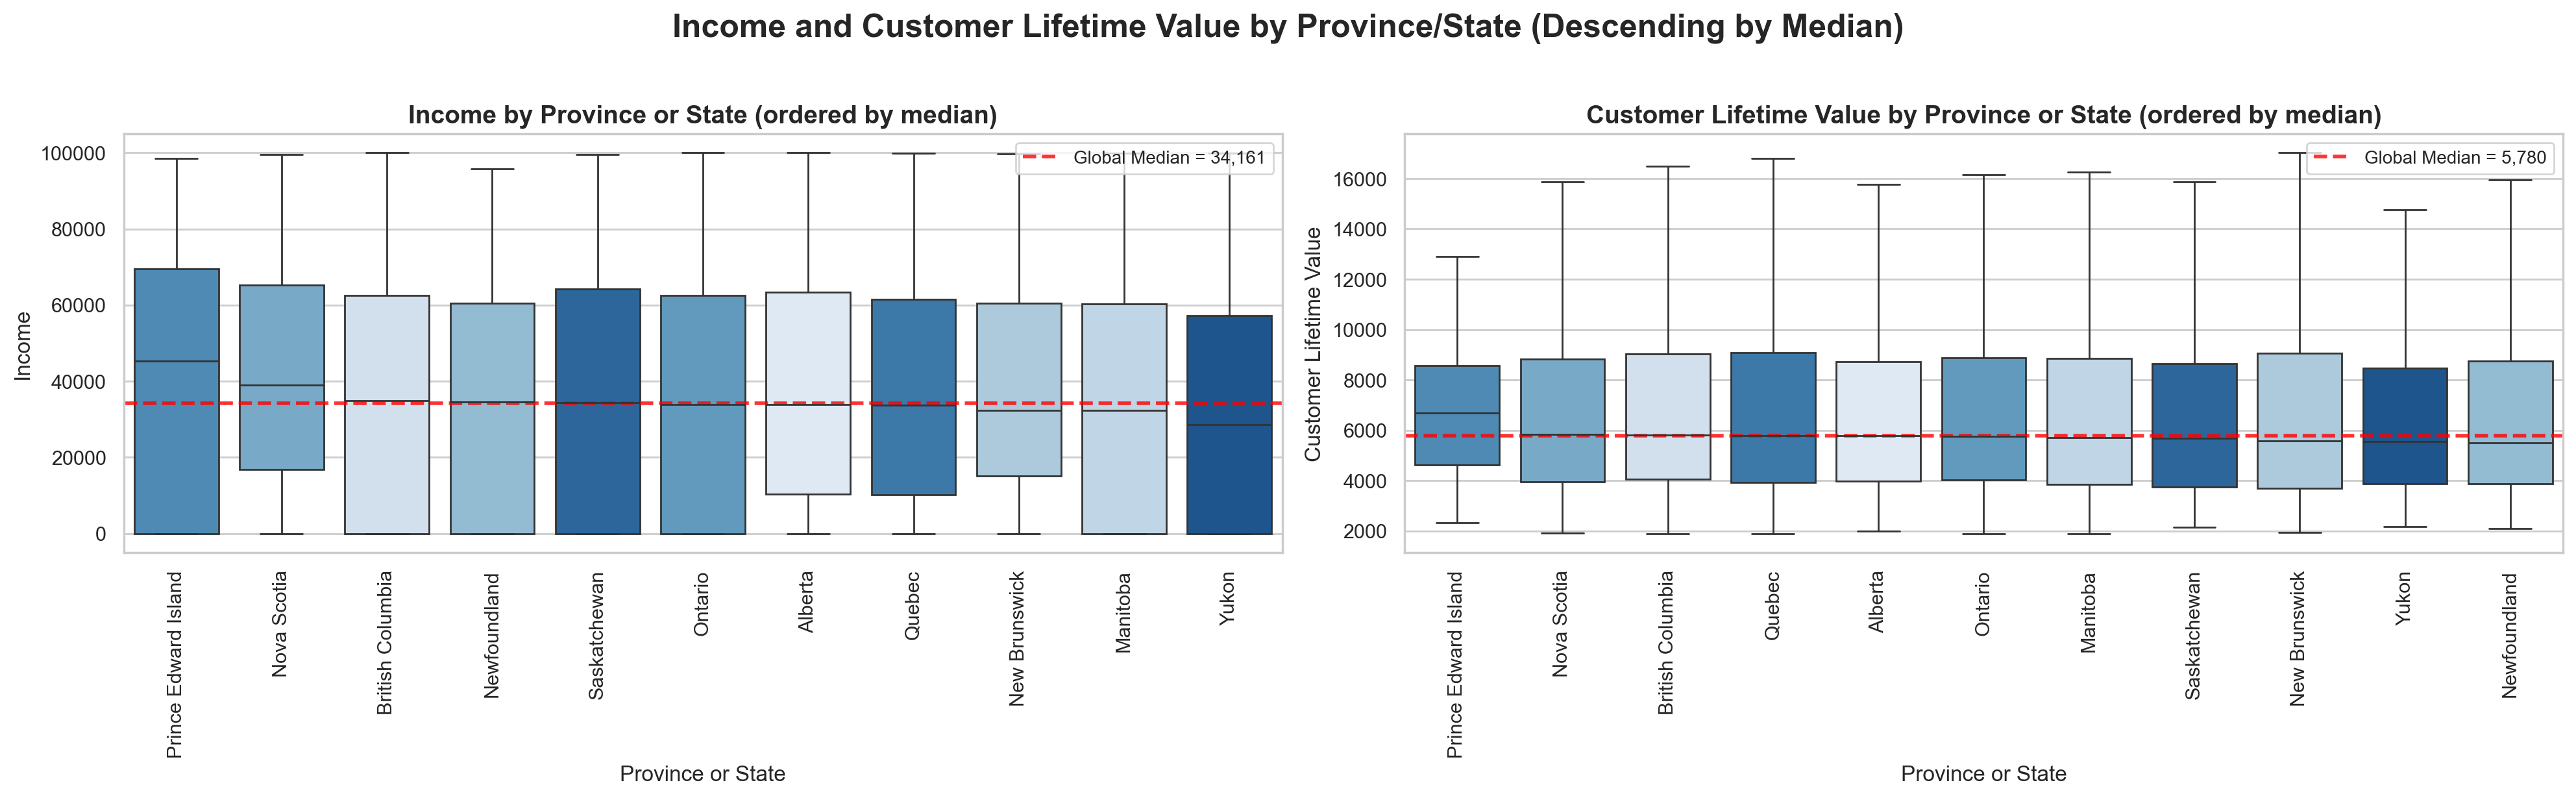

In [7]:
# --- Consistent visual style ---
sns.set_style("whitegrid")

# --- Provinces and color palette (range of blues) ---
provinces = sorted(customer['Province or State'].dropna().unique().tolist())
blue_palette = sns.color_palette("Blues", n_colors=len(provinces) + 2)[1:]
province_color_map = {p: blue_palette[i] for i, p in enumerate(provinces)}

# --- Utility function: boxplot numeric vs categorical ---
def boxplot_num_vs_cat(df, num_col, cat_col, ax, title=None, ylabel=None,
                       rotate_xticks=False, palette=None, show_global_median=True, order=None):
    """Draw boxplot with optional global median line and custom order."""
    temp = df[[num_col, cat_col]].dropna()

    # Compute province median order if not provided
    if order is None:
        medians = temp.groupby(cat_col)[num_col].median().sort_values(ascending=False)
        order = medians.index.tolist()

    # Plot boxplot
    sns.boxplot(
        data=temp,
        x=cat_col, y=num_col,
        order=order,
        showfliers=False,
        palette=palette,
        ax=ax
    )

    # Add global median line
    if show_global_median:
        global_median = temp[num_col].median()
        ax.axhline(global_median, color='red', linestyle='--', linewidth=2, alpha=0.8,
                   label=f"Global Median = {global_median:,.0f}")
        ax.legend(loc='upper right', fontsize=10)

    ax.set_title(title if title else f"{num_col} vs {cat_col}", fontsize=14, fontweight='bold')
    ax.set_xlabel(cat_col)
    ax.set_ylabel(ylabel if ylabel else num_col)
    if rotate_xticks:
        ax.tick_params(axis='x', rotation=90)

# --- Figure layout (1 row, 2 columns) ---
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# 1) Income vs Province (ordered by median, blue range)
boxplot_num_vs_cat(
    customer,
    num_col='Income',
    cat_col='Province or State',
    ax=axes[0],
    title="Income by Province or State (ordered by median)",
    ylabel="Income",
    rotate_xticks=True,
    palette=province_color_map
)

# 2) Customer Lifetime Value vs Province (ordered by median, blue range)
boxplot_num_vs_cat(
    customer,
    num_col='Customer Lifetime Value',
    cat_col='Province or State',
    ax=axes[1],
    title="Customer Lifetime Value by Province or State (ordered by median)",
    ylabel="Customer Lifetime Value",
    rotate_xticks=True,
    palette=province_color_map
)

plt.suptitle("Income and Customer Lifetime Value by Province/State (Descending by Median)", fontsize=18, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()


- **Income** varies slightly across provinces, with **Prince Edward Island** and **Nova Scotia** showing higher medians and **Yukon** lower.  
- **Prince Edward Island**, **Saskatchewan**, **Ontario**, and **Manitoba** show greater income variability.  
- **Customer Lifetime Value** stands out for its higher value in **Prince Edward Island**, while other provinces remain stable.

### 3.3. Geographic Differences with Income

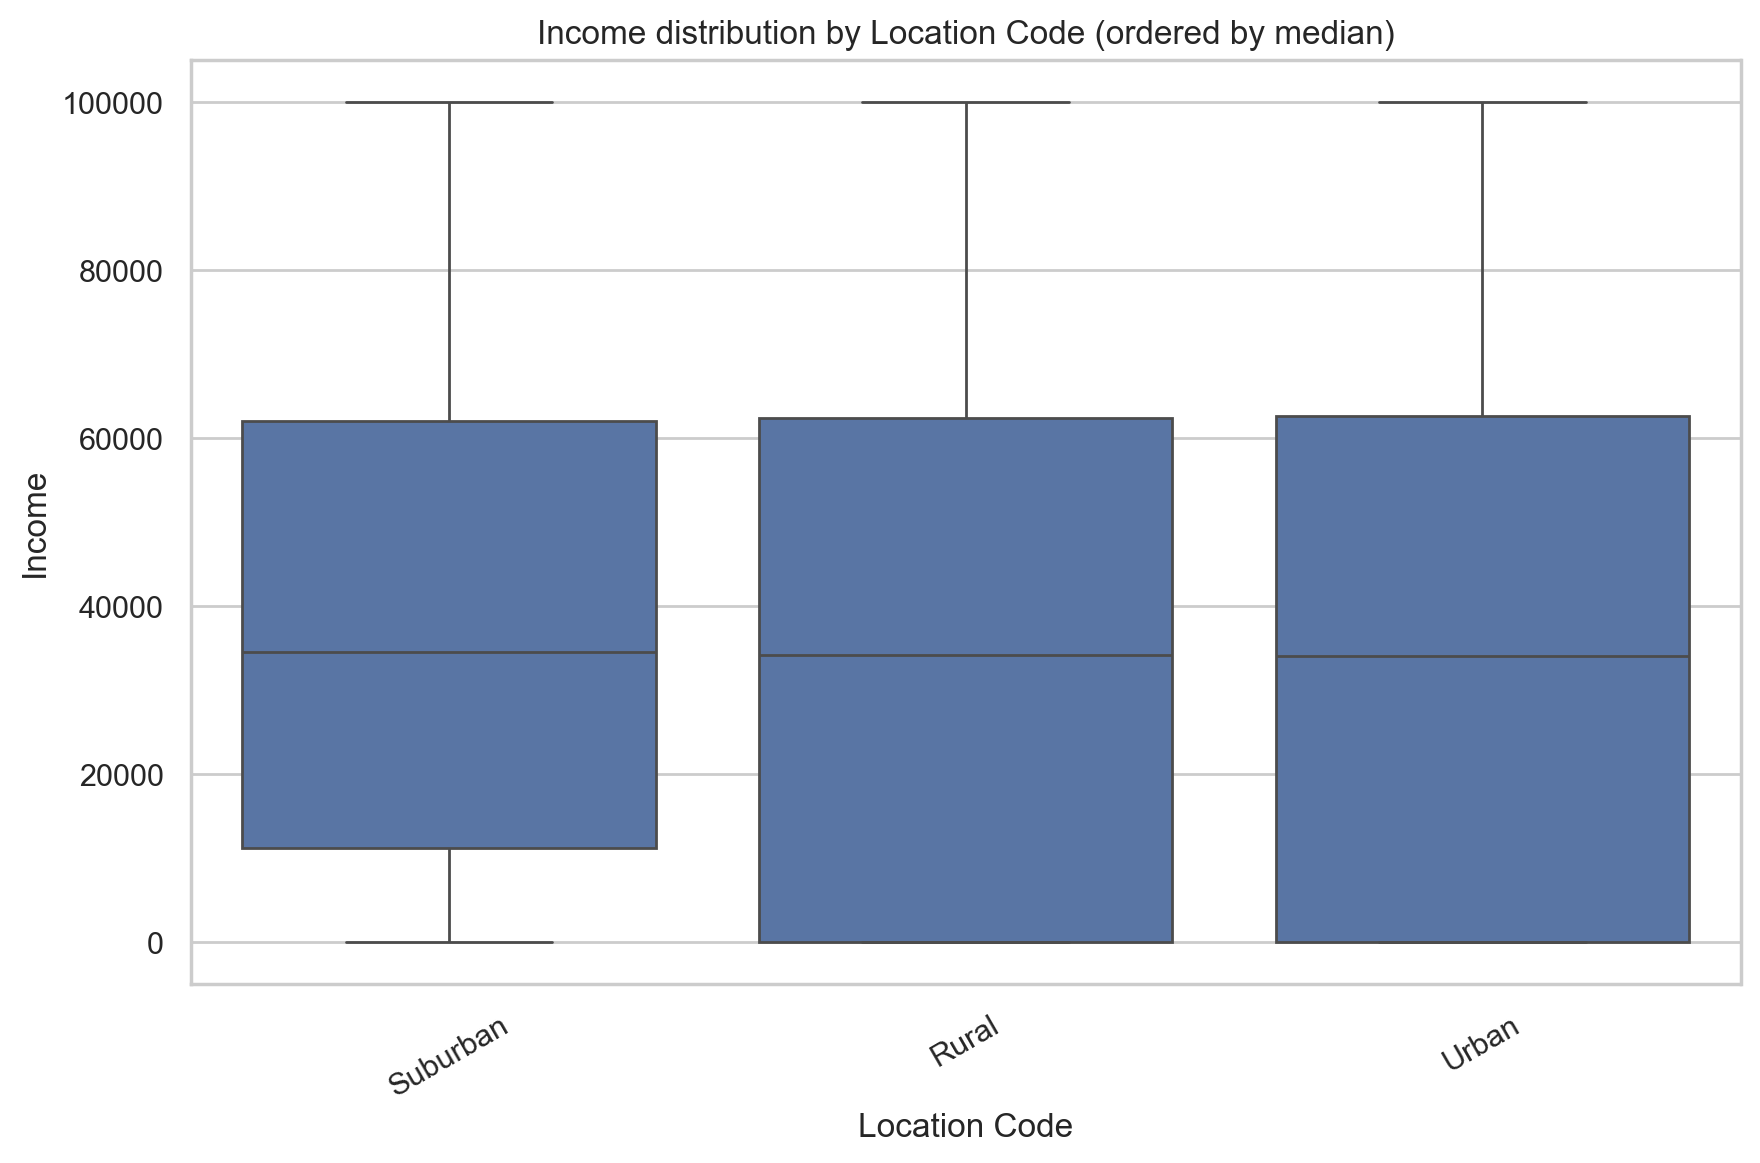

In [8]:
order = (
    customer.groupby("Location Code")["Income"]
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=customer,
    x="Location Code",
    y="Income",
    order=order
)
plt.title("Income distribution by Location Code (ordered by median)")
plt.xticks(rotation=30)
plt.show()


We observe that the median remains constant across location codes, with suburban voters showing smaller variance, due to higher values at the lower end of the income range.

# Conclusion

In this notebook, we aimed to segment customers based on all the profile details we managed to analyse. Multiple approaches were explored, including comparisons of user engagement metrics, loyalty levels, and interaction patterns across different regions. However, after thorough examination, the results consistently showed no significant variance or differentiation in customer interactions or key performance metrics with respect to geography.

This suggests that geographical location is not a meaningful driver of customer behavior within this dataset. Customers appear to interact with the business in a relatively uniform way across regions. Future segmentation efforts might therefore will focus on other dimensions, such as flight purchasing frequency, destination preferences, or loyalty trends, which may provide more actionable insights for targeted strategies.

---

<h1 style="text-align: center;">End of Notebook</h1>

<p style="text-align: center; font-size: 18px;">Thank you for your time.</p>

---